## Time Series Analysis Forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
import datetime
from sklearn.metrics import mean_squared_error

In [2]:
#finding the best model that fits better all data points, as the preparation for the prediction in the final part

In [3]:
dfback = pd.read_csv('dfcleanenergy.csv',sep=';')
dfback = dfback[['date', 'val_capacidadeinstalada']]
dfback['date'] =  pd.to_datetime(dfback['date'], format='%Y-%m-%d')

In [4]:
df = pd.read_csv('dfcleanenergy.csv',sep=';')

In [5]:
df = df[['date', 'val_capacidadeinstalada']]

In [6]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
df.head()

,date,val_capacidadeinstalada
0,2012-01-01,348.90
1,2012-02-01,363.75
2,2012-03-01,363.75
3,2012-04-01,363.75
4,2012-05-01,363.75


In [83]:
df.tail(5)

,date,val_capacidadeinstalada
121,2022-02-01,23737.757533
122,2022-03-01,24022.757533
123,2022-04-01,24143.001533
124,2022-05-01,24907.181533
125,2022-06-01,25201.581533


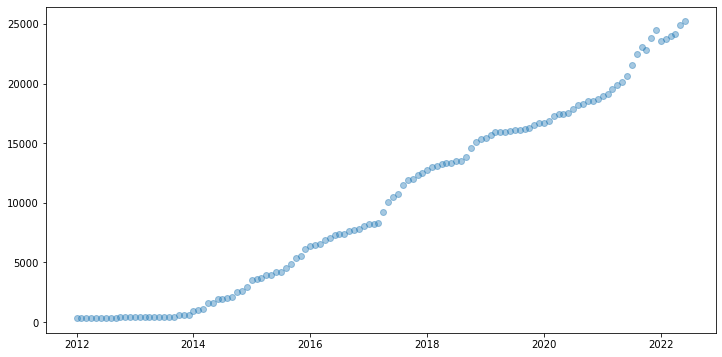

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(df.date, df.val_capacidadeinstalada, alpha=0.4)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
#changing to month-year because we cant work with datetime type in linear regression

In [12]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)

In [13]:
df.date

0      734503
1      734534
2      734563
3      734594
4      734624
        ...  
121    738187
122    738215
123    738246
124    738276
125    738307
Name: date, Length: 126, dtype: int64

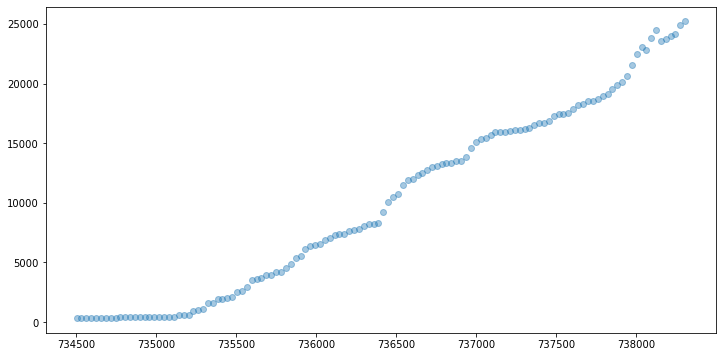

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(df.date, df.val_capacidadeinstalada, alpha=0.4)

In [15]:
X = df[['date']]

In [16]:
y = df[['val_capacidadeinstalada']]

In [17]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
#new_values = pd.DataFrame([2025,2026,2027,2028,2029, 2030])

In [19]:
#model.predict(new_values)

In [20]:
y_predict = model.predict(X)

In [21]:
y_predict 

array([[-3.16887743e+03],
       [-2.95290275e+03],
       [-2.75086192e+03],
       [-2.53488724e+03],
       [-2.32587948e+03],
       [-2.10990480e+03],
       [-1.90089704e+03],
       [-1.68492236e+03],
       [-1.46894767e+03],
       [-1.25993992e+03],
       [-1.04396523e+03],
       [-8.34957478e+02],
       [-6.18982795e+02],
       [-4.03008113e+02],
       [-2.07934206e+02],
       [ 8.04047611e+00],
       [ 2.17048233e+02],
       [ 4.33022916e+02],
       [ 6.42030673e+02],
       [ 8.58005355e+02],
       [ 1.07398004e+03],
       [ 1.28298779e+03],
       [ 1.49896248e+03],
       [ 1.70797023e+03],
       [ 1.92394492e+03],
       [ 2.13991960e+03],
       [ 2.33499351e+03],
       [ 2.55096819e+03],
       [ 2.75997594e+03],
       [ 2.97595063e+03],
       [ 3.18495838e+03],
       [ 3.40093307e+03],
       [ 3.61690775e+03],
       [ 3.82591551e+03],
       [ 4.04189019e+03],
       [ 4.25089795e+03],
       [ 4.46687263e+03],
       [ 4.68284731e+03],
       [ 4.8

In [22]:
print(model.score(X,y))

0.9768007090148992


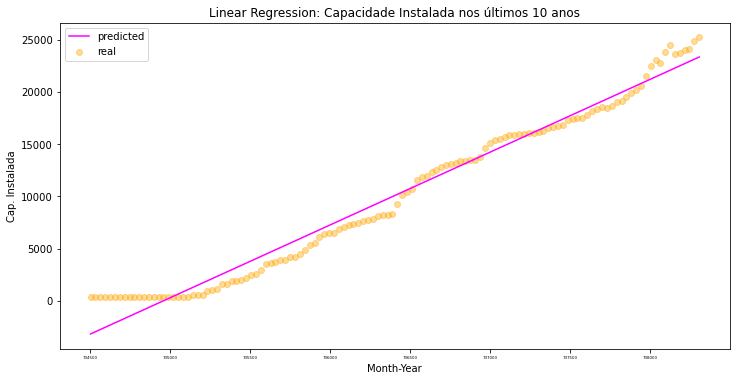

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(df.date, df.val_capacidadeinstalada, alpha=0.4, color='orange', label='real')
plt.plot(df.date, y_predict, color='magenta', label='predicted')
plt.title("Linear Regression: Capacidade Instalada nos últimos 10 anos")
plt.xlabel("Month-Year")
plt.ylabel("Cap. Instalada")
plt.xticks(fontsize=4)
plt.legend()
plt.show()

In [24]:
#ideia do PH - eliminar os dados antes de 2014 pq tem uma reta ali que nao apresenta bem a tendencia dos ultimos anos (comparar valores)

### Podemos ver que o comportamento até o ano de 2014 é uma constante, portanto, irei tirar esses dados do modelo para testar se a reta se ajustará melhor aos pontos:

In [25]:
dfback.head()

,date,val_capacidadeinstalada
0,2012-01-01,348.90
1,2012-02-01,363.75
2,2012-03-01,363.75
3,2012-04-01,363.75
4,2012-05-01,363.75


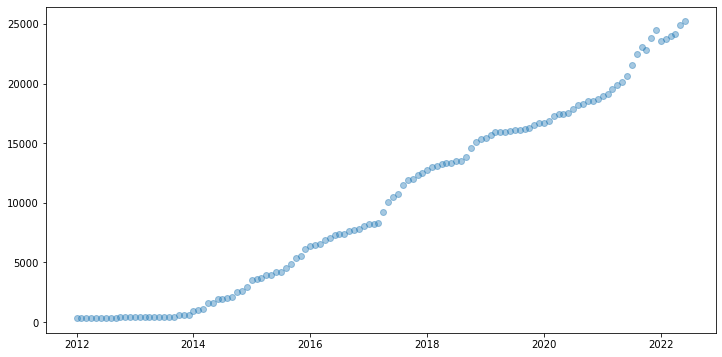

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(dfback.date, dfback.val_capacidadeinstalada, alpha=0.4)

In [27]:
dfback = dfback[dfback.date > pd.to_datetime("2015-01-01", format="%Y-%m-%d") ]

In [28]:
dfback

,date,val_capacidadeinstalada
37,2015-02-01,3634.190000
38,2015-03-01,3695.050000
39,2015-04-01,3914.650000
40,2015-05-01,3914.650000
41,2015-06-01,4183.750000
...,...,...
121,2022-02-01,23737.757533
122,2022-03-01,24022.757533
123,2022-04-01,24143.001533
124,2022-05-01,24907.181533


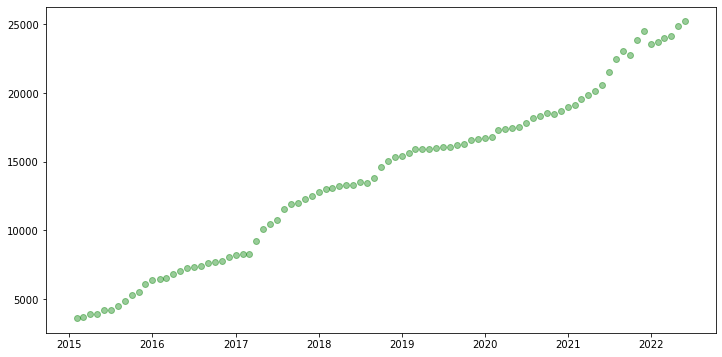

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(dfback.date, dfback.val_capacidadeinstalada, alpha=0.4, color='green')

In [30]:
import datetime as dt
dfback['date'] = pd.to_datetime(dfback['date'])
dfback['date']=dfback['date'].map(dt.datetime.toordinal)

In [31]:
dfback.head()

,date,val_capacidadeinstalada
37,735630,3634.19
38,735658,3695.05
39,735689,3914.65
40,735719,3914.65
41,735750,4183.75


In [32]:
X = dfback[['date']]

In [33]:
y = dfback[['val_capacidadeinstalada']]

In [34]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [35]:
y_predict = model.predict(X)

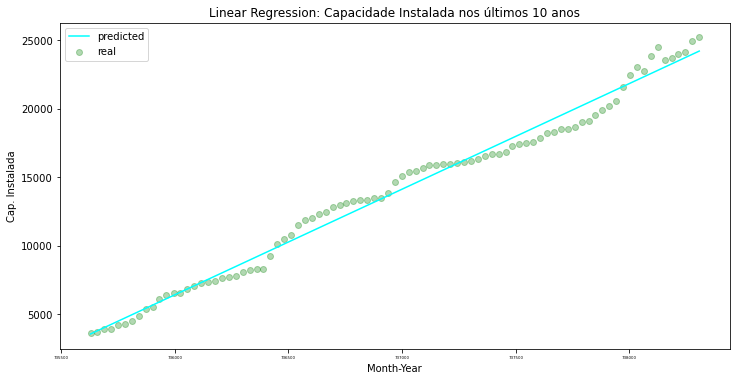

In [36]:
plt.figure(figsize=(12,6))
plt.scatter(dfback.date, dfback.val_capacidadeinstalada, alpha=0.3, color='green', label='real')
plt.plot(dfback.date, y_predict, color='cyan', alpha=1, label='predicted')
plt.title("Linear Regression: Capacidade Instalada nos últimos 10 anos")
plt.xlabel("Month-Year")
plt.ylabel("Cap. Instalada")
plt.xticks(fontsize=4)
plt.legend()
plt.show()

In [37]:
#agora a função está mais ajustada aos pontos. Vamos prever os próximos 10 anos

In [38]:
per = pd.date_range(start= "2022-06-01", end="2031-01-01", freq='1M')

In [39]:
per

DatetimeIndex(['2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31',
               ...
               '2030-03-31', '2030-04-30', '2030-05-31', '2030-06-30',
               '2030-07-31', '2030-08-31', '2030-09-30', '2030-10-31',
               '2030-11-30', '2030-12-31'],
              dtype='datetime64[ns]', length=103, freq='M')

In [40]:
per=per.map(dt.datetime.toordinal)

In [41]:
newdate = pd.DataFrame(per, columns=['date'])

In [42]:
predicted = model.predict(newdate)
predicted

array([[24431.18556266],
       [24670.45273472],
       [24909.71990677],
       [25141.26878295],
       [25380.53595501],
       [25612.08483119],
       [25851.35200325],
       [26090.6191753 ],
       [26306.73145974],
       [26545.9986318 ],
       [26777.54750798],
       [27016.81468004],
       [27248.36355622],
       [27487.63072827],
       [27726.89790033],
       [27958.44677651],
       [28197.71394857],
       [28429.26282475],
       [28668.52999681],
       [28907.79716886],
       [29131.62774917],
       [29370.89492123],
       [29602.44379741],
       [29841.71096947],
       [30073.25984565],
       [30312.5270177 ],
       [30551.79418976],
       [30783.34306594],
       [31022.610238  ],
       [31254.15911418],
       [31493.42628624],
       [31732.69345829],
       [31948.80574273],
       [32188.07291479],
       [32419.62179097],
       [32658.88896302],
       [32890.43783921],
       [33129.70501126],
       [33368.97218332],
       [33600.5210595 ],


In [43]:
newdate['val_capacidadeinstalada'] = predicted

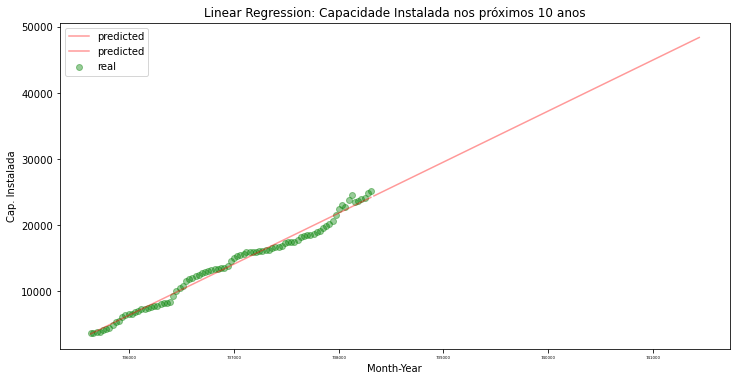

In [44]:
plt.figure(figsize=(12,6))
plt.scatter(dfback.date, dfback.val_capacidadeinstalada, alpha=0.4, color='green', label='real')
plt.plot(dfback.date, y_predict, color='red', alpha=0.4, label='predicted')
plt.plot(newdate.date, newdate.val_capacidadeinstalada, color='red', alpha=0.4, label='predicted')
plt.title("Linear Regression: Capacidade Instalada nos próximos 10 anos")
plt.xlabel("Month-Year")
plt.ylabel("Cap. Instalada")
plt.xticks(fontsize=4)
plt.legend()
plt.show()

In [45]:
newdate.head()

,date,val_capacidadeinstalada
0,738336,24431.185563
1,738367,24670.452735
2,738398,24909.719907
3,738428,25141.268783
4,738459,25380.535955


In [46]:
newdate['date'] = newdate['date'].apply(lambda x: datetime.date.fromordinal(x))


In [47]:
newdate

,date,val_capacidadeinstalada
0,2022-06-30,24431.185563
1,2022-07-31,24670.452735
2,2022-08-31,24909.719907
3,2022-09-30,25141.268783
4,2022-10-31,25380.535955
...,...,...
98,2030-08-31,47462.580447
99,2030-09-30,47694.129323
100,2030-10-31,47933.396495
101,2030-11-30,48164.945371


In [48]:
dfback['date'] = dfback['date'].apply(lambda x: datetime.date.fromordinal(x))

In [49]:
dfback

,date,val_capacidadeinstalada
37,2015-02-01,3634.190000
38,2015-03-01,3695.050000
39,2015-04-01,3914.650000
40,2015-05-01,3914.650000
41,2015-06-01,4183.750000
...,...,...
121,2022-02-01,23737.757533
122,2022-03-01,24022.757533
123,2022-04-01,24143.001533
124,2022-05-01,24907.181533


In [50]:
predictedcap = pd.concat([dfback, newdate])

In [51]:
predictedcap

,date,val_capacidadeinstalada
37,2015-02-01,3634.190000
38,2015-03-01,3695.050000
39,2015-04-01,3914.650000
40,2015-05-01,3914.650000
41,2015-06-01,4183.750000
...,...,...
98,2030-08-31,47462.580447
99,2030-09-30,47694.129323
100,2030-10-31,47933.396495
101,2030-11-30,48164.945371


In [9]:
fortab = pd.read_csv('forecast_tableau.csv', sep=';')

In [13]:
fortab

,Indicador de previsões,Nom Tipousina,Mês de date,Soma de Val Geracao
0,Real,TÉRMICA,abril de 2021,"16958,083"
1,Real,NUCLEAR,abril de 2021,"1860,901"
2,Real,HIDROELÉTRICA,abril de 2021,"80518,333"
3,Real,FOTOVOLTAICA,abril de 2021,"2816,421"
4,Real,EOLIELÉTRICA,abril de 2021,"15994,574"
...,...,...,...,...
1195,Estimar,TÉRMICA,maio de 2021,"16260,202004686"
1196,Estimar,NUCLEAR,maio de 2021,"1872,238044046"
1197,Estimar,HIDROELÉTRICA,maio de 2021,"78860,145931617"
1198,Estimar,FOTOVOLTAICA,maio de 2021,"2877,961423109"


In [11]:
fortab.columns

Index(['Indicador de previsões', 'Nom Tipousina', 'Mês de date',
       'Soma de Val Geracao'],
      dtype='object')

In [30]:
fortab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Indicador de previsões  1200 non-null   object
 1   Nom Tipousina           1200 non-null   object
 2   Mês de date             1200 non-null   object
 3   Soma de Val Geracao     1158 non-null   object
dtypes: object(4)
memory usage: 37.6+ KB


In [32]:
fortab['Mês de date'] = fortab['Mês de date'].astype('string')

In [38]:
fortab['Mês de date']

0       abril de 2021
1       abril de 2021
2       abril de 2021
3       abril de 2021
4       abril de 2021
            ...      
1195     maio de 2021
1196     maio de 2021
1197     maio de 2021
1198     maio de 2021
1199     maio de 2021
Name: Mês de date, Length: 1200, dtype: string

In [17]:
import regex as re

In [39]:
fortab['year'] = fortab['Mês de date'].str.extract('(\d+)')

In [41]:
fortab['month'] = fortab['Mês de date'].str.extract('(\w+)')

In [48]:
fortab.month.value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
Name: month, dtype: int64

In [45]:
dictmonth = {'janeiro':1, 'fevereiro':2, 'março':3, 'abril':4, 'maio':5, 'junho':6, 'julho':7, 'agosto':8, 'setembro':9, 'outubro':10, 'novembro':11, 'dezembro':12}

In [46]:
fortab['month'] = fortab['month'].replace(dictmonth)

In [47]:
fortab

,Indicador de previsões,Nom Tipousina,Mês de date,Soma de Val Geracao,year,month
0,Real,TÉRMICA,abril de 2021,"16958,083",2021,4
1,Real,NUCLEAR,abril de 2021,"1860,901",2021,4
2,Real,HIDROELÉTRICA,abril de 2021,"80518,333",2021,4
3,Real,FOTOVOLTAICA,abril de 2021,"2816,421",2021,4
4,Real,EOLIELÉTRICA,abril de 2021,"15994,574",2021,4
...,...,...,...,...,...,...
1195,Estimar,TÉRMICA,maio de 2021,"16260,202004686",2021,5
1196,Estimar,NUCLEAR,maio de 2021,"1872,238044046",2021,5
1197,Estimar,HIDROELÉTRICA,maio de 2021,"78860,145931617",2021,5
1198,Estimar,FOTOVOLTAICA,maio de 2021,"2877,961423109",2021,5


In [49]:
fortab['date'] = pd.to_datetime(fortab[['year', 'month']].assign(DAY=1))

In [50]:
fortab

,Indicador de previsões,Nom Tipousina,Mês de date,Soma de Val Geracao,year,month,date
0,Real,TÉRMICA,abril de 2021,"16958,083",2021,4,2021-04-01
1,Real,NUCLEAR,abril de 2021,"1860,901",2021,4,2021-04-01
2,Real,HIDROELÉTRICA,abril de 2021,"80518,333",2021,4,2021-04-01
3,Real,FOTOVOLTAICA,abril de 2021,"2816,421",2021,4,2021-04-01
4,Real,EOLIELÉTRICA,abril de 2021,"15994,574",2021,4,2021-04-01
...,...,...,...,...,...,...,...
1195,Estimar,TÉRMICA,maio de 2021,"16260,202004686",2021,5,2021-05-01
1196,Estimar,NUCLEAR,maio de 2021,"1872,238044046",2021,5,2021-05-01
1197,Estimar,HIDROELÉTRICA,maio de 2021,"78860,145931617",2021,5,2021-05-01
1198,Estimar,FOTOVOLTAICA,maio de 2021,"2877,961423109",2021,5,2021-05-01


In [51]:
fortab.to_csv('forecast_tableau.csv',sep=';',index=False)

## Autoregressive Integrated Moving Average (ARIMA)



In [52]:
#Data is stationary?????????????????

To use ARIMA, we need to determine the values for its parameter: p, d, q

- p: the order of the AR term (AR: Auto-Regressive)
- d: the number of differencing
- q: the order of the MA term (MA: Moving Average)

ARIMA requires the dataset to be “stationary” in order for the model to produce accurate predictions. 

In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
df = pd.read_csv('dfcleanenergy.csv',sep=';')

In [55]:
df = df[['date', 'val_capacidadeinstalada']]

In [56]:
df.shape

(126, 2)

In [57]:
df.head()

,date,val_capacidadeinstalada
0,2012-01-01,348.90
1,2012-02-01,363.75
2,2012-03-01,363.75
3,2012-04-01,363.75
4,2012-05-01,363.75


In [58]:
df

,date,val_capacidadeinstalada
0,2012-01-01,348.900000
1,2012-02-01,363.750000
2,2012-03-01,363.750000
3,2012-04-01,363.750000
4,2012-05-01,363.750000
...,...,...
121,2022-02-01,23737.757533
122,2022-03-01,24022.757533
123,2022-04-01,24143.001533
124,2022-05-01,24907.181533


Splitting Data for Training and Testing

An important part of model building is splitting our data for training and testing. Splitting data for training and testing ensures that you build a model that can generalize outside of the training data and it ensures that the performance and outputs are statistically meaningful.

Spliting: 80% for traind and 20% for test
80% of 11 years: 9 years for traind and 2 years for test

We will split our data such that everything before November 2020 will serve as training data, with everything after 2020 becoming the testing data:

In [59]:
df.date.dtypes

dtype('O')

In [60]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

In [61]:
train = df[df.date < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

In [62]:
test = df[df.date > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

In [63]:
train

,date,val_capacidadeinstalada
0,2012-01-01,348.900000
1,2012-02-01,363.750000
2,2012-03-01,363.750000
3,2012-04-01,363.750000
4,2012-05-01,363.750000
...,...,...
101,2020-06-01,17531.434533
102,2020-07-01,17826.946533
103,2020-08-01,18193.690533
104,2020-09-01,18310.360533


In [64]:
len(df)

126

In [65]:
len(train)

106

In [66]:
len(test)

19

In [67]:
perctrain = len(train)*100/len(df)
perctrain

84.12698412698413

In [68]:
perctest = len(test)*100/len(df)
perctest

15.079365079365079

In [69]:
train.reset_index(drop=True)

,date,val_capacidadeinstalada
0,2012-01-01,348.900000
1,2012-02-01,363.750000
2,2012-03-01,363.750000
3,2012-04-01,363.750000
4,2012-05-01,363.750000
...,...,...
101,2020-06-01,17531.434533
102,2020-07-01,17826.946533
103,2020-08-01,18193.690533
104,2020-09-01,18310.360533


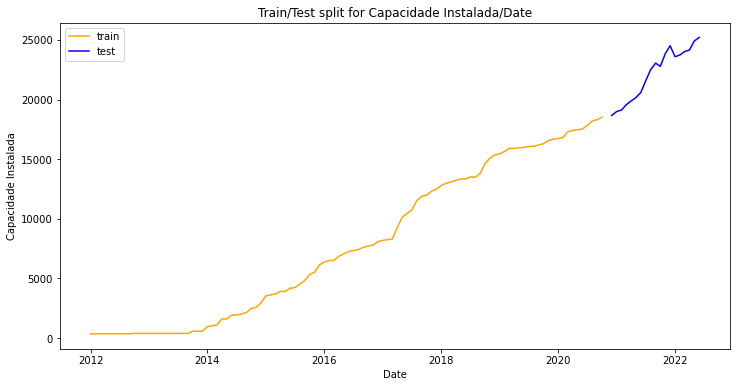

In [70]:
plt.figure(figsize=(12,6))
plt.plot(train.date, train.val_capacidadeinstalada, color = "orange", label='train')
plt.plot(test.date,test.val_capacidadeinstalada, color = "blue", label='test')
plt.ylabel("Capacidade Instalada")
plt.xlabel("Date")
plt.title("Train/Test split for Capacidade Instalada/Date")
plt.legend()
plt.show()

An ARIMA task has three parameters. The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling shock events).

Let’s define an ARIMA model with order parameters (2,2,2):

In [71]:
y = train["val_capacidadeinstalada"]

In [72]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

In [73]:
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['Predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

In [74]:
y_pred_df

,lower val_capacidadeinstalada,upper val_capacidadeinstalada,Predictions
107,18343.573131,19067.896035,18705.734583
108,18293.200863,19494.452738,18893.826800
109,18267.520797,19893.953554,19080.737175
110,18254.039581,20279.983285,19267.011433
111,18247.218440,20658.564379,19452.891410
112,18244.181552,21032.852264,19638.516908
113,18243.207505,21404.745406,19823.976455
114,18243.149727,21775.505286,20009.327506
115,18243.190271,22146.024886,20194.607579
116,18242.721304,22516.961117,20379.841210


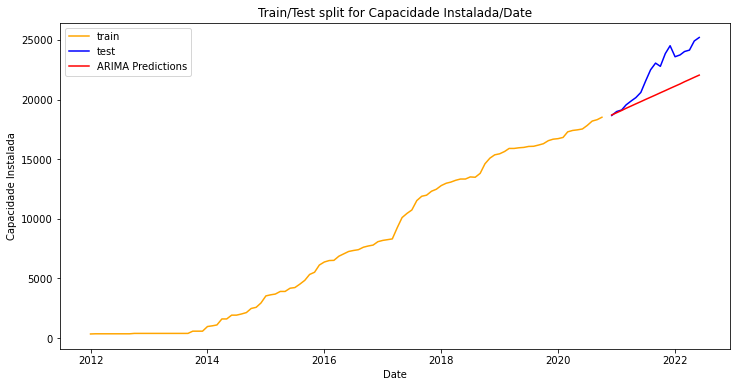

In [75]:
plt.figure(figsize=(12,6))
plt.plot(train.date, train.val_capacidadeinstalada, color = "orange", label='train')
plt.plot(test.date, test.val_capacidadeinstalada, color = "blue", label='test')
plt.plot(test.date, y_pred_out, color="red", label = "ARIMA Predictions")
plt.ylabel("Capacidade Instalada")
plt.xlabel("Date")
plt.title("Train/Test split for Capacidade Instalada/Date")
plt.legend()
plt.show()

In [76]:
arma_rmse = np.sqrt(mean_squared_error(test["val_capacidadeinstalada"].values, y_pred_df["Predictions"]))

In [77]:
arma_rmse

2139.2886047089205

##  Let’s try increasing the differencing parameter to ARIMA (4,4,1):

In [78]:
ARIMAmodel = ARIMA(y, order = (4, 4, 1))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['Predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [79]:
y_pred_df

,lower val_capacidadeinstalada,upper val_capacidadeinstalada,Predictions
107,18388.588190,19274.703309,18831.645749
108,18230.248445,20050.378425,19140.313435
109,17880.627650,20886.379144,19383.503397
110,17350.216837,21957.671122,19653.943980
111,16622.924004,23367.354317,19995.139160
112,15640.557643,25015.720535,20328.139089
113,14414.976562,26868.876512,20641.926537
114,12938.128056,29023.162790,20980.645423
115,11192.633974,31516.345476,21354.489725
116,9148.418292,34316.274690,21732.346491


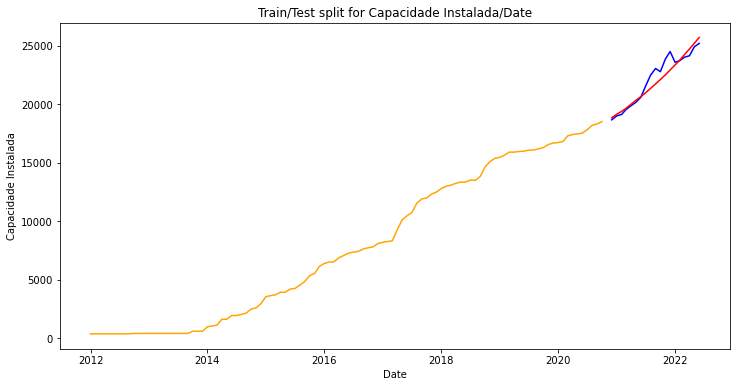

In [80]:
plt.figure(figsize=(12,6))
plt.plot(train.date, train.val_capacidadeinstalada, color = "orange")
plt.plot(test.date, test.val_capacidadeinstalada, color = "blue")
plt.plot(test.date, y_pred_out, color="red", label = "ARIMA Predictions")
plt.ylabel("Capacidade Instalada")
plt.xlabel("Date")
plt.title("Train/Test split for Capacidade Instalada/Date")
plt.show()

In [81]:
arma_rmse = np.sqrt(mean_squared_error(test["val_capacidadeinstalada"].values, y_pred_df["Predictions"]))

In [82]:
arma_rmse

691.6277362754499

In [52]:
#______________